# Machine Learning for Computer Vision
## Assignment 1 - Group 06



## 1.1.1 The MNIST data set

In [1]:
from packages import *

import data_manager
import perceptron

### Read Data

In [2]:
### Read data
x_train, y_train, x_test, y_test = data_manager.read_mnist_data()

### In case the images should be saved to jpg files
# save_images_to_jpgs('./images/train2', x_train, y_train)
# save_images_to_jpgs('./images/test2', x_test, y_test)

### Reshape images and make them binary

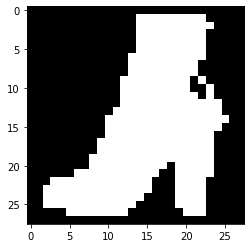

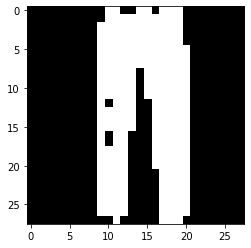

In [3]:
### Extracting subset of classes Ankle boot(9) and Trousers(1)
indices = np.where((y_train == 1) | (y_train == 9))
mnist_subset_rows = x_train[indices]
image_subset = mnist_subset_rows.reshape(mnist_subset_rows.shape[0],28,28)
label_subset = y_train[indices]

### Convert images to binary
thres = 127
image_subset[image_subset < thres] = 0
image_subset[image_subset >= thres] = 1

plt.imshow(image_subset[1],  cmap='gray')
plt.show()
plt.imshow(image_subset[3],  cmap='gray')
plt.show()

### Extract features from the data

In [28]:
### Choose a smaller subset for testing purposes
image_subsubset = image_subset[20:70]
label_subsubset = label_subset[20:70]

features_subset = data_manager.extract_features(image_subsubset, label_subsubset)

### Normalize features
features_subset.area = features_subset.area / max(features_subset.area)
features_subset.cx = features_subset.cx / max(features_subset.cx)
features_subset.cy = features_subset.cy / max(features_subset.cy)
features_subset.convex_area = features_subset.convex_area / max(features_subset.convex_area)
features_subset.eccentricity = features_subset.convex_area / max(features_subset.convex_area)
features_subset.perimeter = features_subset.convex_area / max(features_subset.convex_area)

features_subset

,class,cx,cy,area,convex_area,eccentricity,perimeter,extent
image,,,,,,,,
0,Trouser,0.799732,0.662486,0.489691,0.466912,0.466912,0.466912,0.678571
1,Trouser,0.752527,0.696776,0.708763,0.632353,0.632353,0.632353,0.701531
2,Trouser,0.778916,0.655652,0.492268,0.450368,0.450368,0.450368,0.620130
3,Trouser,0.799651,0.639671,0.432990,0.431985,0.431985,0.431985,0.600000
4,Trouser,0.751379,0.693649,0.595361,0.568015,0.568015,0.568015,0.687500
5,Ankle boot,0.886669,0.953578,0.680412,0.599265,0.599265,0.599265,0.589286
6,Ankle boot,0.999140,0.952172,0.262887,0.428309,0.428309,0.428309,0.301775
7,Trouser,0.772485,0.482101,0.226804,0.411765,0.411765,0.411765,0.325926
8,Ankle boot,0.902046,0.904952,0.832474,0.761029,0.761029,0.761029,0.591575


### Plotting features

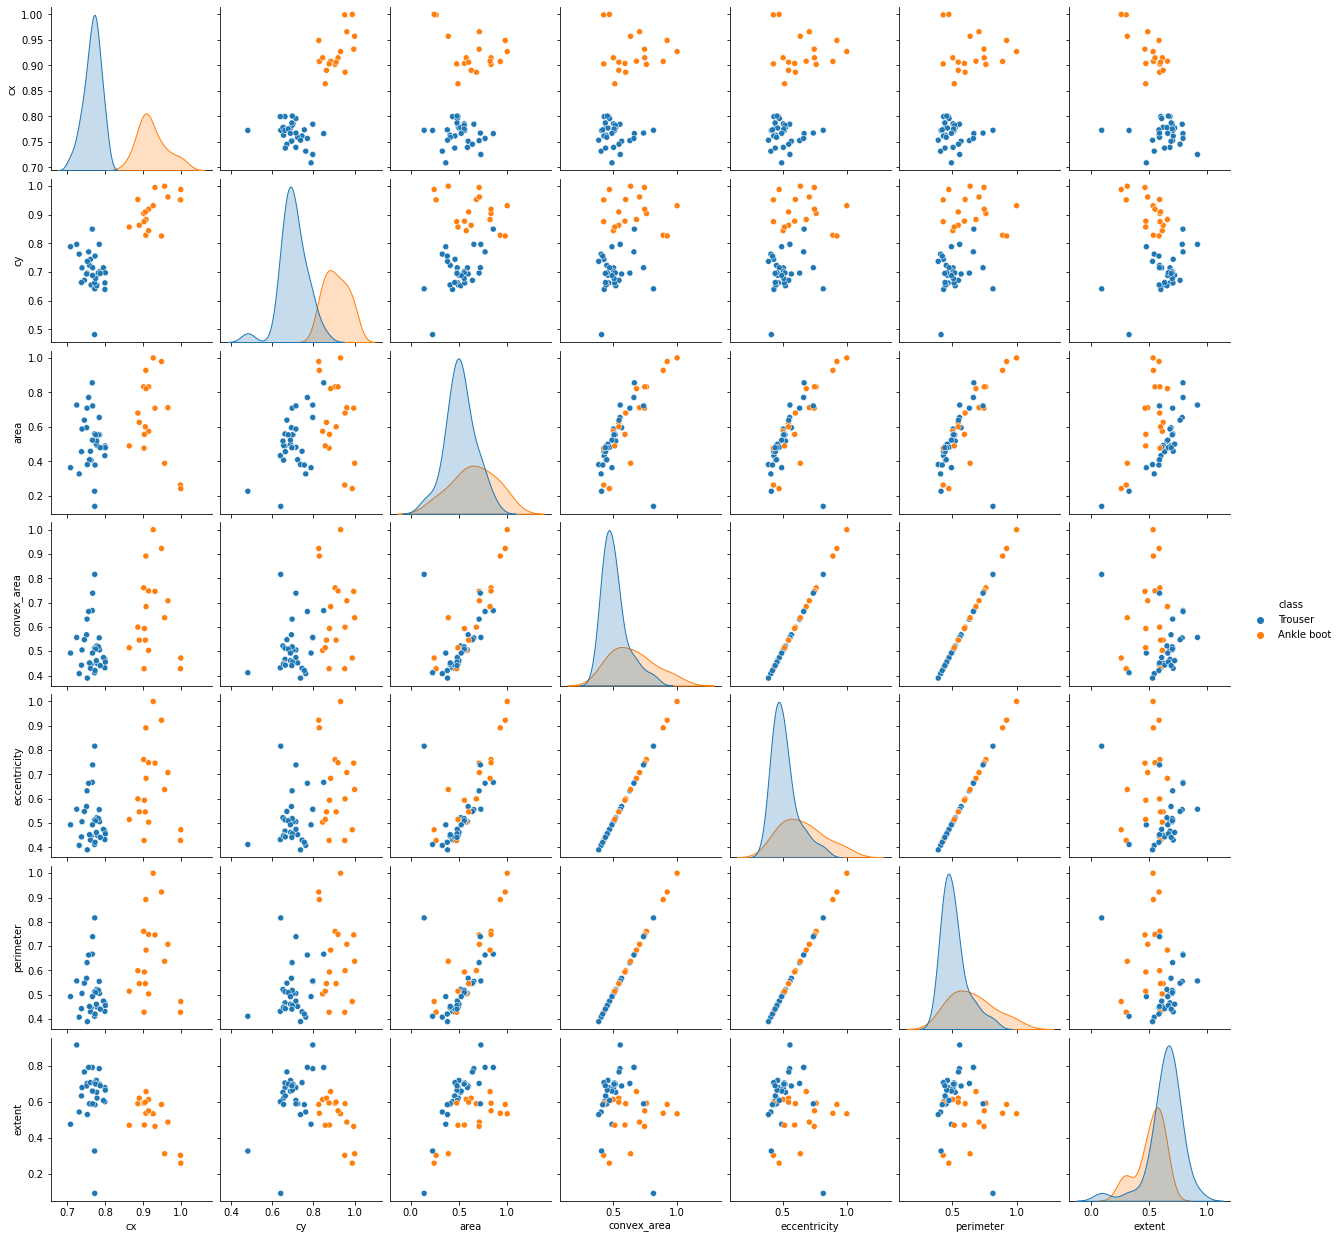

In [29]:
### Comparing different feature combinations
sns.pairplot(features_subset, hue="class");

<AxesSubplot:xlabel='perimeter', ylabel='cx'>

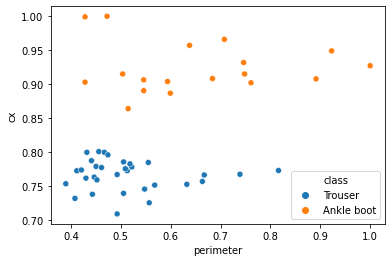

In [30]:
### Best combination with this subset seems to be 'perimeter' and the centroid 'cx'
sns.scatterplot(data=features_subset, x='perimeter', y='cx', hue='class')

## 1.1.2 Perceptron training algorithm

In [31]:
X = np.vstack((features_subset.perimeter, features_subset.cx))

## Convert Ankle boot label from 9 to -1 for training
t = label_subsubset.astype(int)
t[t==int(9)] = -1

maxIts = 100
online = True

w = perceptron.percTrain(X, t, maxIts, online)
prediction = perceptron.perc(w, X)

8 epochs needed. w = [ 4.         -1.10845588 -3.99863182]
Prediction: [ 1.  1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.
  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.
  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.]
